### Python Project - (Prosper Loan Exploratory Data Analysis)




### By Moyinoluwa Akinbo


### Introduction 
I conducted an Exploratory Data Analysis
(EDA) on a dataset from Prosper, a leading marketplace lending platform in the United States that has funded over $9 billion in loans. The dataset contains information on 113,937 loans and 81 variables, including borrower rate, loan amount, current loan status, borrower income, employment status, credit history, and payment information. The primary objectives of this project is to analyze and summarize the key features that could impact the loan status and to explore the potential relationships among various variables through summary statistics and data visualization techniques.

### Preliminary Wrangling

In [62]:
import seaborn as sns
#sns.set()
sns.set(style="whitegrid")


import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [63]:

#importing the dataset into pandas 
dd_df= pd.read_csv('Prosper Loan.csv')
dd_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [94]:
dd_df.rename(columns={'ProsperRating (numeric)': 'prosperrating(numeric)'}, inplace = True)

In [95]:
#This gives information about the datatype(columns, column labels, column datatype, number of cells in each column)
dd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [66]:
dd_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,prosperrating(numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset
The structure of this dataset is a tabular data structure with 113,937 rows and 81 columns. Each row in the dataset represents a single instance of the prosper loan data, and each column correspond to a particular attribute or feature of the prosper loan.

### What is/are the main feature(s) of interest in your dataset?
~Term

~Credit Grade

~Employment status

~Occupation

~Investor

~Borrower rate

~Loan status

~Loan original amount

~Monthly loan payment

### What features do you think in the dataset will help support your investigation into your feature(s) of interest?

~Borrower status

~Employment status

~Term

~Occupation

~Home owners

## Univariate Exploration

In this section, investigate distributions of individual variables. If there are unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [67]:
#The borrowerrate is the interest rate at whivh money may be borrowed.
dd_df['BorrowerRate'].value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.1287       1
0.2852       1
0.2768       1
0.0559       1
0.2192       1
Name: BorrowerRate, Length: 2294, dtype: int64

Text(0, 0.5, 'Frequency')

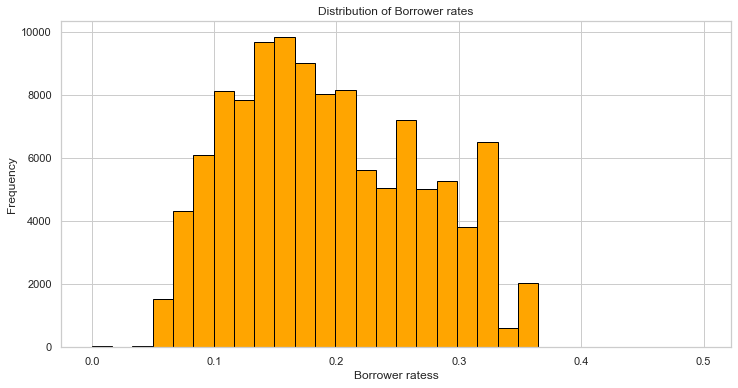

In [68]:
# What is the distribution of borrower rates in the dataset?

plt.figure(figsize=(12,6))
# Select the borrower rate column
borrower_rates = dd_df['BorrowerRate']

# Create a histogram of the borrower rates
plt.hist(borrower_rates, bins=30, color='orange', edgecolor='black')

# Set the plot title and axis labels
plt.title("Distribution of Borrower rates")
plt.xlabel("Borrower ratess")
plt.ylabel("Frequency")


### Observation

I observed that the majority of loans have borrower rates between 0.1 and 0.25.

In [69]:
dd_df['LoanOriginalAmount'].value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
14383        1
6251         1
14447        1
6379         1
4098         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

Text(0, 0.5, 'Count')

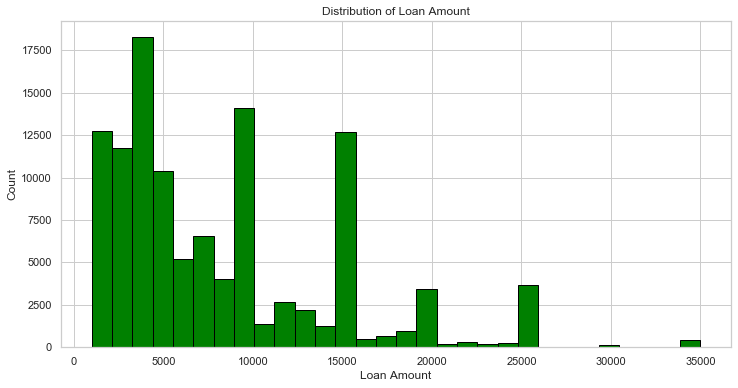

In [70]:
plt.figure(figsize=(12,6))
# Select the LoanOriginalAmount column
Loan_Amount = dd_df['LoanOriginalAmount']

# Create a histogram of the borrower rates
plt.hist(Loan_Amount, bins=30, color='Green', edgecolor='black')

# Set the plot title and axis labels
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")


### Observation

The distribution of Loan Amount indicates that the majority of loans are of smaller amounts. The most common Loan Amount falls between 5,000 to 15,000. There are also a significant number of loans in the range of 20,000 and 25,000 but not as frequent as the previous observation. The frequency of loans decreases as the loan amount increases beyond 25,000. My observation is that, most loans above 25,000 are usually not approved.

In [77]:
 dd_df['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [78]:
bb = dd_df['IsBorrowerHomeowner'].value_counts()

([<matplotlib.patches.Wedge at 0x1cc0dd27fc8>,
 [Text(0.015452850100920767, -1.0998914534733684, 'True'),
  Text(-0.015452850100920632, 1.0998914534733684, 'False')],
 [Text(0.008428827327774963, -0.5999407928036554, '50.4%'),
  Text(-0.008428827327774889, 0.5999407928036554, '49.6%')])

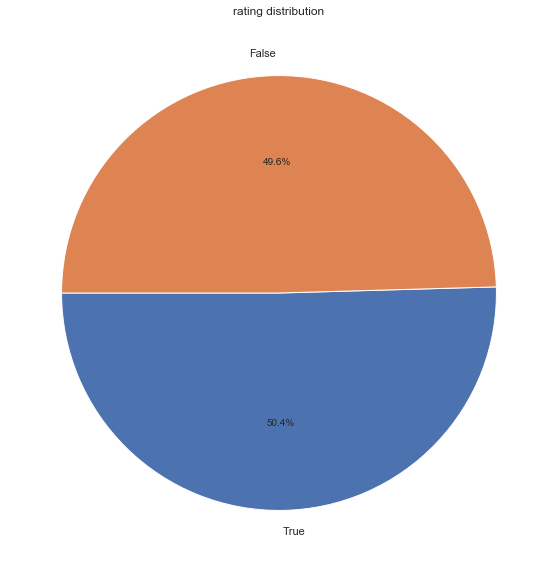

In [79]:
plt.figure(figsize=(20,10))
plt.title('rating distribution')
plt.pie(bb,labels=bb.index, autopct='%1.1f%%', startangle=180, shadow=False)

In [53]:
dd_df['Occupation'].value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [54]:
# what is the distribution of employment status among borrowers
employment_status = dd_df.EmploymentStatus

Text(0, 0.5, 'employment status')

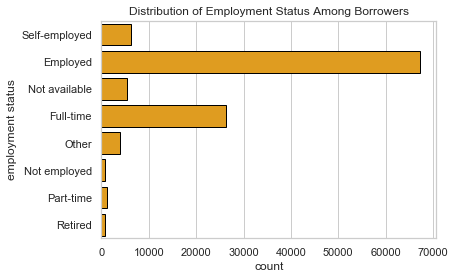

In [80]:
# Create a bar chart using seaborn
sns.countplot(data=dd_df, y='EmploymentStatus', color='orange', edgecolor='black')

# set the chart title and axis labels
plt.title('Distribution of Employment Status Among Borrowers')
plt.xlabel('count')
plt.ylabel('employment status')


### observations
I noticed that majority of the borrowers, over 60,000 were employed, with over 20,000 having full-time jobs. it is evident that the company provides loans to individuals with a stable source of income.

In [88]:
dd_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Text(0, 0.5, 'loan status')

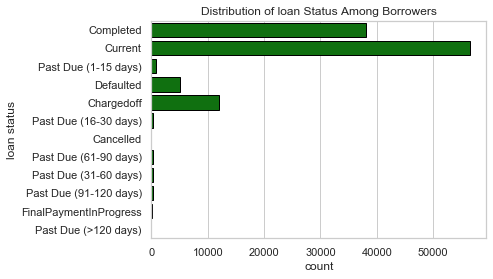

In [89]:
# Create a chart using seaborn
sns.countplot(data=dd_df, y='LoanStatus', color='green', edgecolor='black')

# set the chart title and axis labels
plt.title('Distribution of loan Status Among Borrowers')
plt.xlabel('count')
plt.ylabel('loan status')


### observations
The LoanStatus shows an interesting insight indicating that majority of loans were completed while a small proportion of loans have eiter been defaulted or past due the payback period by a number of days.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
Borrower Rate, The distribution of borrower rates in the dataset is roughly normal, having borrower rates between 0.1 and 0.25 and the distribution of loan amount is uneven, with most loans falling in the range of 5,000 to 15,000.

### Bivariate Exploration
In this section, investigate relationships between pairs of variables in the dataset. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

Text(0, 0.5, 'Loan Original Amount')

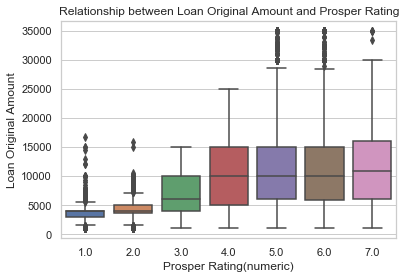

In [58]:
# Relationship between Loan Original Amount and Prosper Ratings


sns.boxplot(x='prosperrating(numeric)', y='LoanOriginalAmount', data=dd_df)


# Set the title and axis labels
plt.title('Relationship between Loan Original Amount and Prosper Rating')
plt.xlabel('Prosper Rating(numeric)')
plt.ylabel('Loan Original Amount')



### Observation
It was observed that borrowers with a higher Prosper Rating are opportuned to receive larger loans than those with lower ratings. Also, there is more variability in loan amounts offered to borrowers with a higher rating, as shown by the increasing interquartile range (IQR) of Loan Original Amount with a higher Prosper rating. It is important to note that there are outliers in the  Prosper Rating category, which shows
that some borrowers with a very high loan amount are affecting the distribution of loan, as well as some borrowers with very low amounts.

Text(0.5, 0, 'Employment Status')

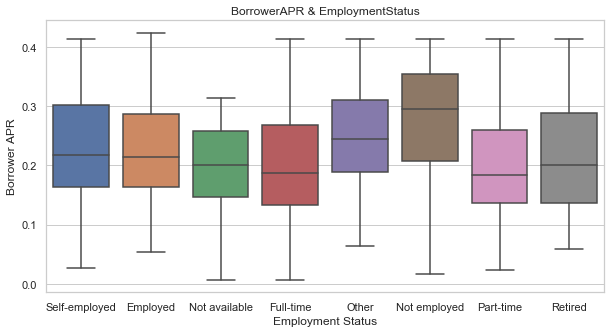

In [120]:
# Borrower APR vs Employment status
plt.figure(figsize = [10, 5])

sns.boxplot(data=dd_df,y='BorrowerAPR',x='EmploymentStatus')
plt.title('BorrowerAPR & EmploymentStatus')
plt.ylabel('Borrower APR')
plt.xlabel('Employment Status')

### Observation
On Borrower APR vs Employment status chart, it was observed that Employed people have lower Interquartile range (IQR) than those that are not employed.

### Conclusion
Based on the analysis of the data from Prosper Loan, it can be concluded that borrowers with a high Prosper rating are likely to have lower APRs, higher loan amounts. However, there are some outliers and variations in loan performance even among borrowers with the same prosper ratings, indicating that other factors may also influence loan performance. Therefore, lenders should also consider other factors to make decisions.
